In [237]:
import pandas as pd
import numpy as np

In [238]:
#IMPORT DATASET

# ISEAR ###############################
# dataset_dir = "dataset/ISEAR.csv"
# df = pd.read_csv(dataset_dir, encoding='latin-1')

######################################

# dataset_dir = "dataset/data_train.csv"
# df = pd.read_csv(dataset_dir, encoding='latin-1')

# EMOINT ############################## 
dataset_dir_train = "dataset/EmoInt_Train.txt"
df_train = pd.read_csv(dataset_dir_train, sep="\t")

dataset_dir_test = "dataset/EmoInt_Test.txt"
df_test = pd.read_csv(dataset_dir_test, sep="\t")

dataset_dir_dev = "dataset/EmoInt_Dev.txt"
df_dev = pd.read_csv(dataset_dir_dev, sep="\t")

df = pd.concat([df_train, df_test, df_dev], ignore_index=True)

######################################

# df = df.drop_duplicates()


# df = pd.read_csv('dataset/train.txt', header =None, sep =';', names = ['Text','Emotion'], encoding='utf-8')

# df = pd.read_csv('dataset/train_2.txt', header =None, sep =';', names = ['Text','Emotion'], encoding='utf-8')

# with open('./out_train/dial.txt', encoding='utf-8') as f:
#     data = f.readlines();

# df1 = pd.DataFrame(data, columns=['Text'])

# with open('./out_train/emo.txt', encoding='utf-8') as f:
#     data = f.readlines();

# df = pd.concat([df1, pd.DataFrame(data, columns=['Emotion'])], axis=1)
# df = df.drop_duplicates()

# emotion_map = {'0\n': 'no emotion', '1\n': 'anger', '2\n': 'disgust', '3\n': 'fear', '4\n': 'happiness', '5\n': 'sadness', '6\n': 'surprise'}

# df['Emotion'] = df['Emotion'].map(emotion_map)

# df = df[df['Emotion'] != 'no emotion']

In [239]:
print(df['Emotion'].value_counts())

Emotion
fear       2252
anger      1701
joy        1616
sadness    1533
Name: count, dtype: int64


In [240]:
#CONSTANTS
max_embedding_length = 300 #MAX EMBEDDING DIMENSION
max_sequence_length = 400 #INPUT LENGTH

In [241]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [242]:
def clean_df(df):
    # Remove username
    df['Text'] = df['Text'].apply(lambda x: re.sub('@[^\s]+', '', x))

    # Remove hashtags
    df['Text'] = df['Text'].apply(lambda x: re.sub('#[\s]+', '', x))

    # Remove numbers
    df['Text'] = df['Text'].apply(lambda x: re.sub('\d+', '', x))

    # Remove punctuations
    df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^\w\s]+', '', x))

    # Convert to lowercase
    df['Text'] = df['Text'].apply(lambda x: x.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    df['Text'] = df['Text'].apply(lambda x: ' '.join(
        [word for word in x.split() if word not in stop_words]))

    # Tokenize
    df['Tokenized'] = df['Text'].apply(lambda x: nltk.word_tokenize(x))

    def lemmatize(text):
        lemmatizer = WordNetLemmatizer()

        lemmatized = [lemmatizer.lemmatize(token) for token in text]
        return lemmatized

    df['Lemmatized'] = df['Tokenized'].apply(lemmatize)


    detokenizer = TreebankWordDetokenizer()

    df['Detokenized'] = df['Lemmatized'].apply(lambda x: detokenizer.detokenize(x))

    print(len(df[df['Text'].duplicated()]))

    print(df[df['Text'].duplicated()])

    df = df.drop_duplicates(subset='Text', keep="last")

    return df

In [243]:
df = clean_df(df)

264
         No                                               Text  Emotion   
535   10535  best revenge move get continue succeed never g...    anger  \
1517  20660  hello nthe bigger bully crocodile tears bullie...     fear   
1567  20710  alarm clock ringing morning n flatmate knocked...     fear   
2191  30187           watch amazing lively broadcast musically      joy   
2228  30224    watch amazing lively broadcast lively musically      joy   
...     ...                                                ...      ...   
7044  40802  would frown bit folding arms every time im nee...  sadness   
7051  40809  frustration looking elphaba frown aggravation ...  sadness   
7086  40844  yesterday finished watching penny dreadful bea...  sadness   
7099  40857  invest new film stop asking invest new film co...  sadness   
7100  40858  watched django unchained people may frown titt...  sadness   

     Intensity                                          Tokenized   
535      0.438  [best, rev

In [244]:
len(df[df['Text'].duplicated()])

0

In [245]:
df

,No,Text,Emotion,Intensity,Tokenized,Lemmatized,Detokenized
0,10000,fuk heck moved fridge knock landlord door angr...,anger,0.938,"[fuk, heck, moved, fridge, knock, landlord, do...","[fuk, heck, moved, fridge, knock, landlord, do...",fuk heck moved fridge knock landlord door angr...
1,10001,indian uber driver called someone n word wasnt...,anger,0.896,"[indian, uber, driver, called, someone, n, wor...","[indian, uber, driver, called, someone, n, wor...",indian uber driver called someone n word wasnt...
2,10002,asked parcel delivered pick store address fumi...,anger,0.896,"[asked, parcel, delivered, pick, store, addres...","[asked, parcel, delivered, pick, store, addres...",asked parcel delivered pick store address fumi...
3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896,"[ef, whichever, butt, wipe, pulled, fire, alar...","[ef, whichever, butt, wipe, pulled, fire, alar...",ef whichever butt wipe pulled fire alarm davis...
4,10004,dont join put phone talk rude taking money acc...,anger,0.896,"[dont, join, put, phone, talk, rude, taking, m...","[dont, join, put, phone, talk, rude, taking, m...",dont join put phone talk rude taking money acc...
...,...,...,...,...,...,...,...
7097,40855,common app randomly logged writing last part c...,sadness,NONE,"[common, app, randomly, logged, writing, last,...","[common, app, randomly, logged, writing, last,...",common app randomly logged writing last part c...
7098,40856,id rather laugh rarest genius beautiful allian...,sadness,NONE,"[id, rather, laugh, rarest, genius, beautiful,...","[id, rather, laugh, rarest, genius, beautiful,...",id rather laugh rarest genius beautiful allian...
7099,40857,invest new film stop asking invest new film co...,sadness,NONE,"[invest, new, film, stop, asking, invest, new,...","[invest, new, film, stop, asking, invest, new,...",invest new film stop asking invest new film co...
7100,40858,watched django unchained people may frown titt...,sadness,NONE,"[watched, django, unchained, people, may, frow...","[watched, django, unchained, people, may, frow...",watched django unchained people may frown titt...


In [246]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [247]:
def convert_categorical(df):
    le = LabelEncoder()
    y = le.fit_transform(df['Emotion'])
    return to_categorical(y)

In [248]:
y = convert_categorical(df)

In [249]:
print(y)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [250]:
from sklearn.model_selection import train_test_split

In [251]:
def split_dataset(x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

    return X_train, X_test, X_val, y_train, y_test, y_val

X_train, X_test, X_val, y_train, y_test, y_val = split_dataset(df['Detokenized'], y);

In [252]:
print(len(X_train))
print(len(X_test))
print(len(X_val))

4786
1026
1026


In [253]:
def concatenate_text(data):
    return [''.join(text) for text in data]

text_arr = concatenate_text(df['Detokenized'])
text_train_arr = concatenate_text(X_train)
text_test_arr = concatenate_text(X_test)
text_val_arr = concatenate_text(X_val)

In [254]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [255]:
def try_pad_sequence(text_arr, tokenizer):
    sequences = tokenizer.texts_to_sequences(text_arr)
    padded_sequence = pad_sequences(sequences, maxlen = max_sequence_length )
    return padded_sequence

In [256]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_arr)

X_train_padded = try_pad_sequence(text_train_arr, tokenizer)
X_test_padded = try_pad_sequence(text_test_arr, tokenizer)
X_val_padded = try_pad_sequence(text_val_arr, tokenizer)

In [257]:
from gensim.models import KeyedVectors

In [258]:
#EMBEDDING MATRIX CREATION -> CHOOSE ONE

#1ST CHOICE -> USING GLOVE OR FASTTEXT -> JUST CHANGE THE FILEPATH # wiki-news-300d-1M.vec # glove.6B.300d.txt
embeddings_glove = {}
with open('embedding/glove.6B.300d.txt', encoding='utf-8') as f:
    for line in f:
        token = line.split()[0]
        embeddings_glove[token] = np.array(line.split()[1:], dtype='float32')

embeddings_fasttext = {}
with open('embedding/wiki-news-300d-1M.vec', encoding='utf-8') as f:
    for line in f:
        token = line.split()[0]
        embeddings_fasttext[token] = np.array(line.split()[1:], dtype='float32')

#2ND CHOICE -> USING WORD2VEC
embeddings_word2vec = KeyedVectors.load_word2vec_format('embedding/GoogleNews-vectors-negative300.bin', binary=True)

In [259]:
def create_embedding_matrix(embeddings):
    embedding_matrix = np.zeros((len(tokenizer.word_index)+1, max_embedding_length))

    for word, i in tokenizer.word_index.items():
        if i < len(tokenizer.word_index) + 1 and word in embeddings:
            embedding_matrix[i] = embeddings[word]
    return embedding_matrix

In [260]:
embedding_matrix_glove = create_embedding_matrix(embeddings_glove);
embedding_matrix_fasttext = create_embedding_matrix(embeddings_fasttext);
embedding_matrix_word2vec = create_embedding_matrix(embeddings_word2vec);

print(embedding_matrix_glove)
print(embedding_matrix_fasttext)
print(embedding_matrix_word2vec)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.17876001 -0.56186002  0.048086   ...  0.81068999 -0.20186
   0.29166999]
 [-0.13443001 -0.016333    0.091076   ... -0.27469    -0.059464
   0.49494001]
 ...
 [-0.090789   -0.26831999  0.11522    ...  0.70754999 -0.30475
   0.14005999]
 [ 0.084833   -0.51994997  0.36021999 ...  0.61309999 -0.027423
  -0.59460002]
 [ 0.23741999 -0.32387999  0.32978001 ... -0.050098    0.066446
  -0.14917   ]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.22579999 -0.0178     -0.1021     ... -0.0805      0.0623
   0.0801    ]
 [-0.0637     -0.073      -0.0434     ...  0.31209999  0.0271
  -0.0763    ]
 ...
 [ 0.0016     -0.1065      0.062      ...  0.25870001 -0.26050001
   0.049     ]
 [ 0.0613     -0.19329999  0.0372     ...  0.163      -0.0453
   0.05      ]
 [ 0.0721     -0.0771      0.1248     ...  0.2306     -0.1978
   0.0043    ]]
[[ 0.          0.          0.         ...  0.          0.
  

In [261]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, GRU, Conv1D, GlobalMaxPool1D, Flatten
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers

In [262]:
def test_model(type="LSTM", embedding="Word2Vec"):
    model = Sequential()

    if (embedding == "Word2Vec"):
        model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                            output_dim=max_embedding_length, 
                            input_length = max_sequence_length, 
                            weights = [embedding_matrix_word2vec], 
                            trainable=False))
    elif (embedding == "Glove"):
        model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                            output_dim=max_embedding_length, 
                            input_length = max_sequence_length, 
                            weights = [embedding_matrix_glove], 
                            trainable=False))
    else:
        model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                            output_dim=max_embedding_length, 
                            input_length = max_sequence_length, 
                            weights = [embedding_matrix_fasttext], 
                            trainable=False))
        
    if (type == "LSTM"):
        model.add(LSTM(128, kernel_regularizer=regularizers.l2(0.02), return_sequences=True))
    elif (type == "BiLSTM"):
        model.add(Bidirectional(LSTM(128, kernel_regularizer=regularizers.l2(0.02), return_sequences=True)))
    elif (type == "GRU"):
        model.add(GRU(128, kernel_regularizer=regularizers.l2(0.02), return_sequences=True))
    else:
        model.add(Bidirectional(GRU(128, kernel_regularizer=regularizers.l2(0.02), return_sequences=True)))
    
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=0.001)

    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    model.summary()

    history = model.fit(X_train_padded, y_train, validation_data=(X_val_padded, y_val), epochs=10, batch_size= 64)

    #Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(type + ' + ' + embedding + ' Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.savefig(type + '_' + embedding + ' Model Loss.png')
    plt.show()

    #Accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(type + ' + ' + embedding + ' Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.savefig(type + '_' + embedding + ' Model Accuracy.png')
    plt.show()

    prediction_results = model.predict(X_test_padded)
    prediction_results = np.argmax(prediction_results, axis=1)

    y_test_result = np.argmax(y_test, axis=1)

    # y_test_decoded = le.inverse_transform(y_test_result)
    # prediction_decoded = le.inverse_transform(prediction_results)

    # comparison_df = pd.DataFrame({'Actual Value': y_test_decoded, 'Predicted Value': prediction_decoded})
    # print(comparison_df)

    # comparison_df.to_csv(type+'.csv', index=False)

    test_accuracy = accuracy_score(y_test_result, prediction_results)
    test_recall = recall_score(y_test_result, prediction_results, average='weighted')
    test_precision = precision_score(y_test_result, prediction_results, average='weighted')
    test_f1 = f1_score(y_test_result, prediction_results, average='weighted')

    print(f"Accuracy: {test_accuracy:.3f}%")
    print(f"Recall Score: {test_recall:.3f}")
    print(f"Precision: {test_precision:.3f}")
    print(f"F1 Score: {test_f1:.3f}")

    loss, accuracy = model.evaluate(X_test_padded, y_test)

    print(loss, accuracy)
    
    results = {
        'Accuracy': test_accuracy,
        'Recall': test_recall,
        'Precision': test_precision,
        'F1 Score': test_f1
    }

    return results

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 lstm_8 (LSTM)               (None, 400, 128)          219648    
                                                                 
 global_max_pooling1d_17 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 4)                 516       
                                                                 
Total params: 3,884,664
Trainable params: 220,164
Non-trainable params: 3,664,500
_____________________________________

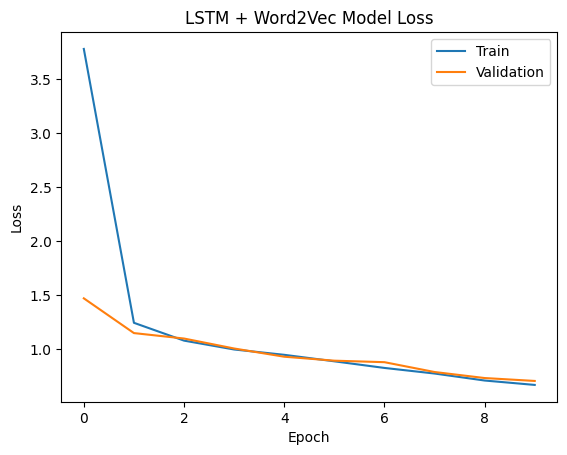

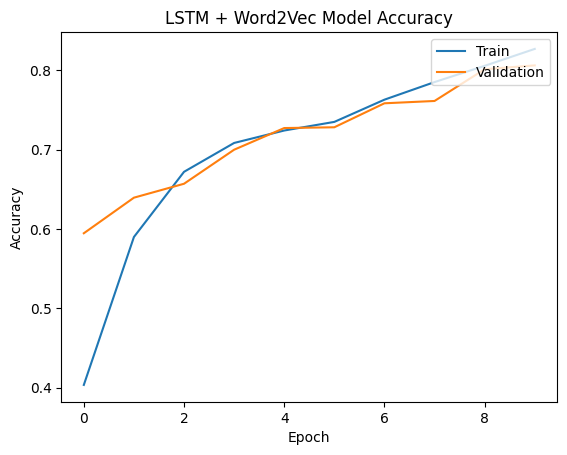

33/33 [==============================] - 1s 11ms/step
Accuracy: 0.805%
Recall Score: 0.805
Precision: 0.815
F1 Score: 0.806
33/33 [==============================] - 0s 12ms/step - loss: 0.7016 - accuracy: 0.8051
0.701643705368042 0.8050682544708252
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 lstm_9 (LSTM)               (None, 400, 128)          219648    
                                                                 
 global_max_pooling1d_18 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 d

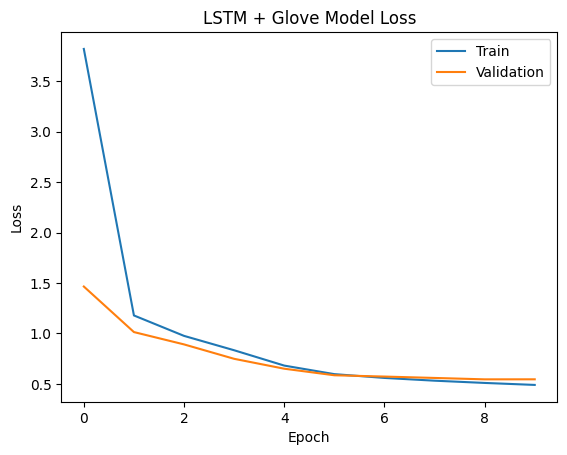

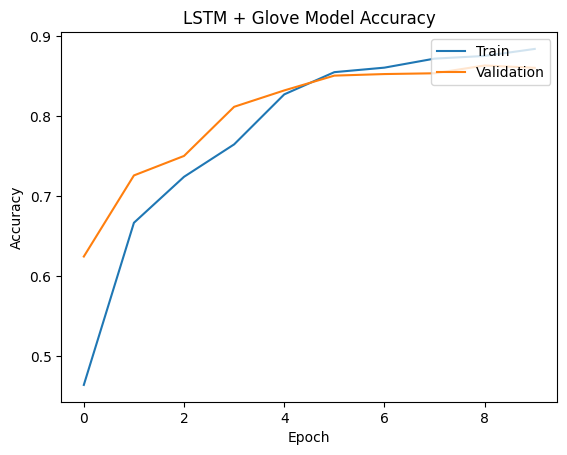

33/33 [==============================] - 1s 13ms/step
Accuracy: 0.863%
Recall Score: 0.863
Precision: 0.867
F1 Score: 0.863
33/33 [==============================] - 0s 13ms/step - loss: 0.5514 - accuracy: 0.8626
0.5514494776725769 0.8625730872154236
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 lstm_10 (LSTM)              (None, 400, 128)          219648    
                                                                 
 global_max_pooling1d_19 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 

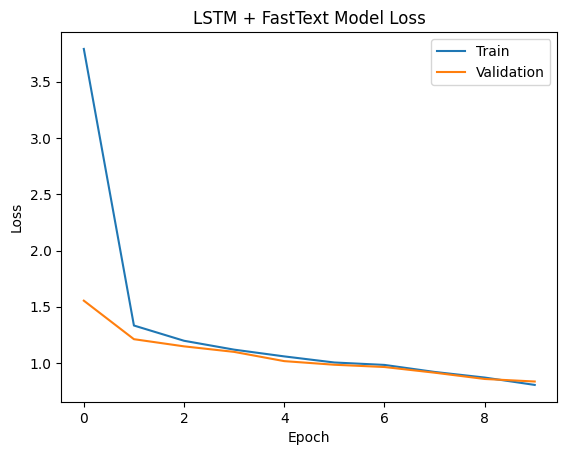

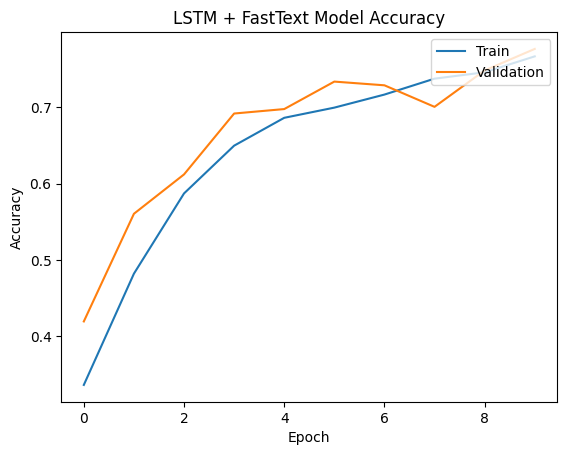

33/33 [==============================] - 1s 11ms/step
Accuracy: 0.792%
Recall Score: 0.792
Precision: 0.797
F1 Score: 0.791
33/33 [==============================] - 0s 12ms/step - loss: 0.8316 - accuracy: 0.7924
0.8315651416778564 0.792397677898407


In [263]:
res_lstm_word2vec = test_model("LSTM", "Word2Vec")
res_lstm_glove = test_model("LSTM", "Glove")
res_lstm_fasttext = test_model("LSTM", "FastText")

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 bidirectional_9 (Bidirectio  (None, 400, 256)         439296    
 nal)                                                            
                                                                 
 global_max_pooling1d_20 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 4,104,824
Trainable params: 440,324
Non

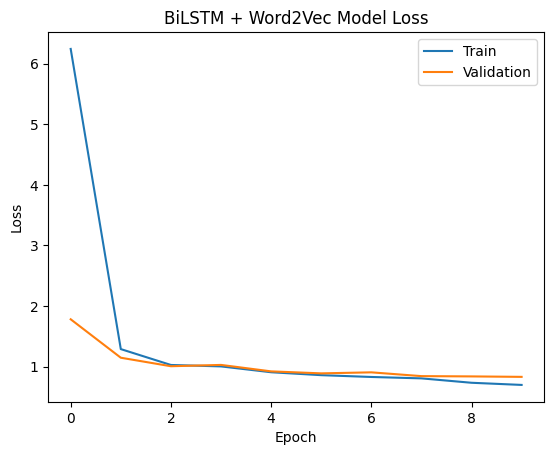

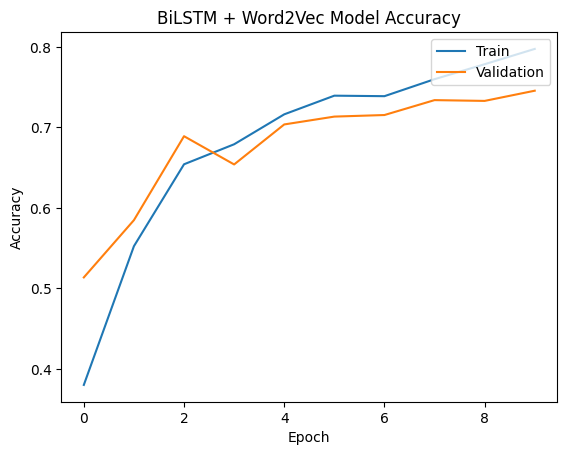

33/33 [==============================] - 1s 21ms/step
Accuracy: 0.752%
Recall Score: 0.752
Precision: 0.765
F1 Score: 0.750
33/33 [==============================] - 1s 22ms/step - loss: 0.7904 - accuracy: 0.7524
0.7904185652732849 0.752436637878418
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 bidirectional_10 (Bidirecti  (None, 400, 256)         439296    
 onal)                                                           
                                                                 
 global_max_pooling1d_21 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
  

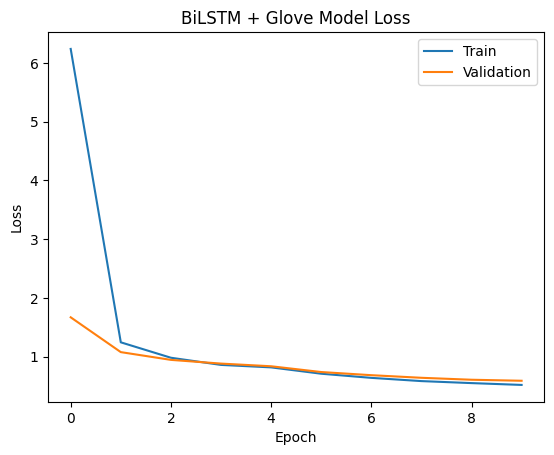

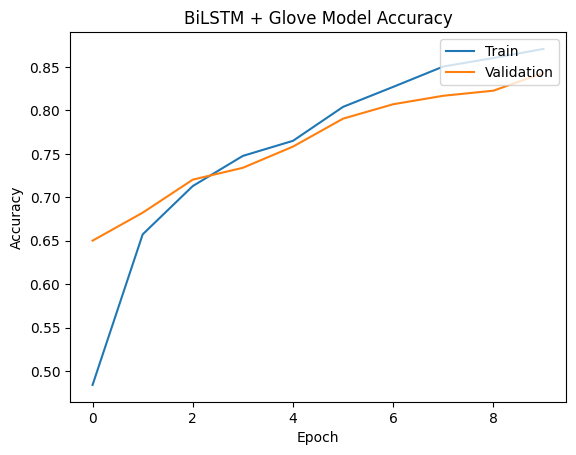

33/33 [==============================] - 1s 21ms/step
Accuracy: 0.850%
Recall Score: 0.850
Precision: 0.855
F1 Score: 0.851
33/33 [==============================] - 1s 21ms/step - loss: 0.5899 - accuracy: 0.8499
0.5899202823638916 0.8499025106430054
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 bidirectional_11 (Bidirecti  (None, 400, 256)         439296    
 onal)                                                           
                                                                 
 global_max_pooling1d_22 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
 

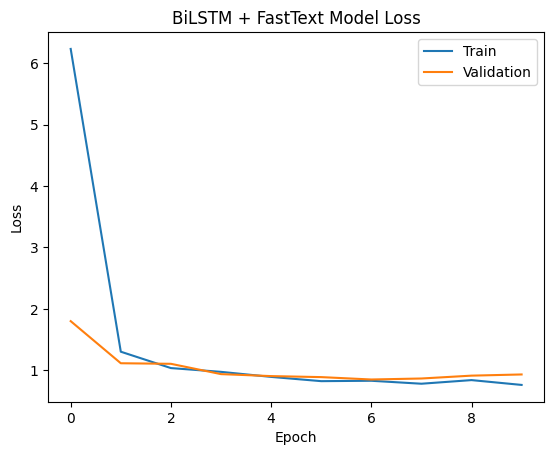

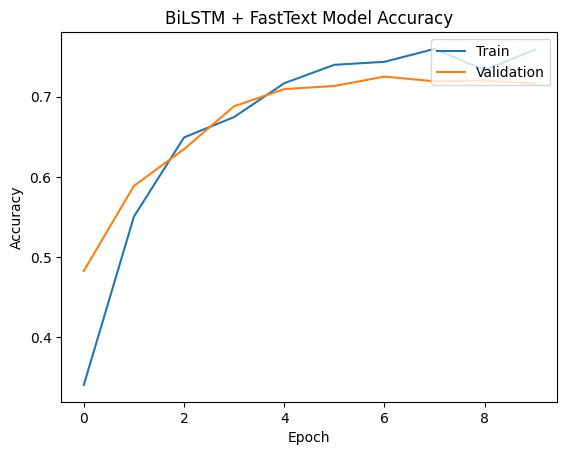

33/33 [==============================] - 1s 21ms/step
Accuracy: 0.728%
Recall Score: 0.728
Precision: 0.757
F1 Score: 0.722
33/33 [==============================] - 1s 23ms/step - loss: 0.8840 - accuracy: 0.7281
0.8840007185935974 0.7280701994895935


In [264]:
res_bilstm_word2vec = test_model("BiLSTM", "Word2Vec")
res_bilstm_glove = test_model("BiLSTM", "Glove")
res_bilstm_fasttext = test_model("BiLSTM", "FastText")

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 gru_9 (GRU)                 (None, 400, 128)          165120    
                                                                 
 global_max_pooling1d_23 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 516       
                                                                 
Total params: 3,830,136
Trainable params: 165,636
Non-trainable params: 3,664,500
_____________________________________

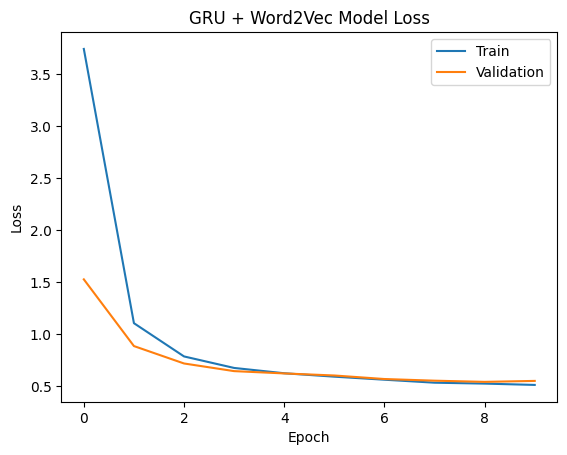

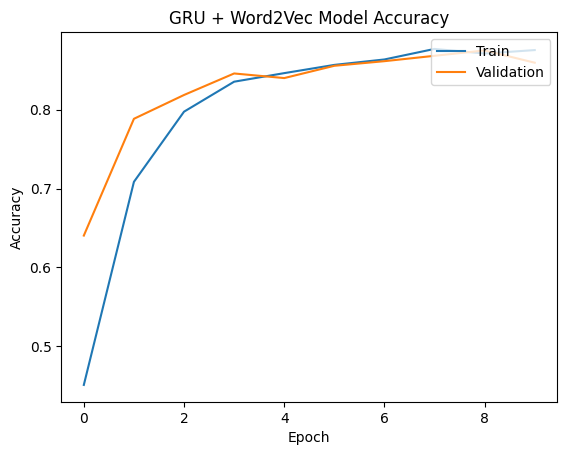

33/33 [==============================] - 1s 9ms/step
Accuracy: 0.859%
Recall Score: 0.859
Precision: 0.862
F1 Score: 0.858
33/33 [==============================] - 0s 10ms/step - loss: 0.5541 - accuracy: 0.8587
0.5540559887886047 0.8586744666099548
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 gru_10 (GRU)                (None, 400, 128)          165120    
                                                                 
 global_max_pooling1d_24 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 d

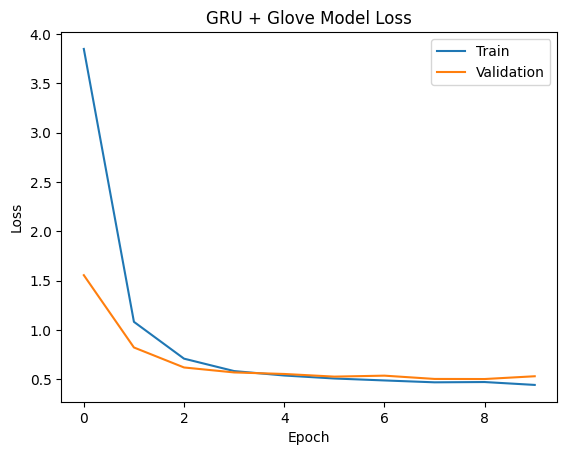

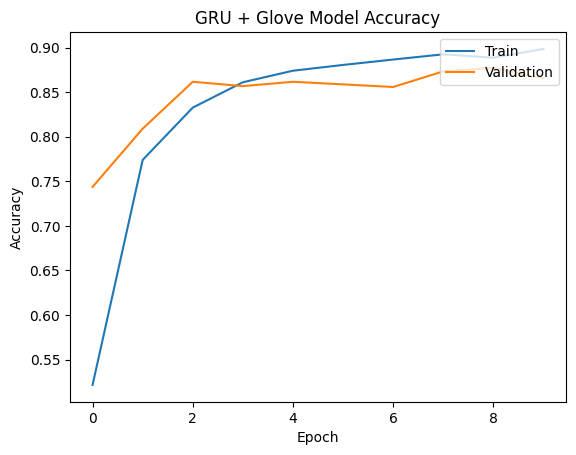

33/33 [==============================] - 1s 15ms/step
Accuracy: 0.874%
Recall Score: 0.874
Precision: 0.883
F1 Score: 0.875
33/33 [==============================] - 0s 13ms/step - loss: 0.5177 - accuracy: 0.8743
0.5176846981048584 0.8742690086364746
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 gru_11 (GRU)                (None, 400, 128)          165120    
                                                                 
 global_max_pooling1d_25 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 

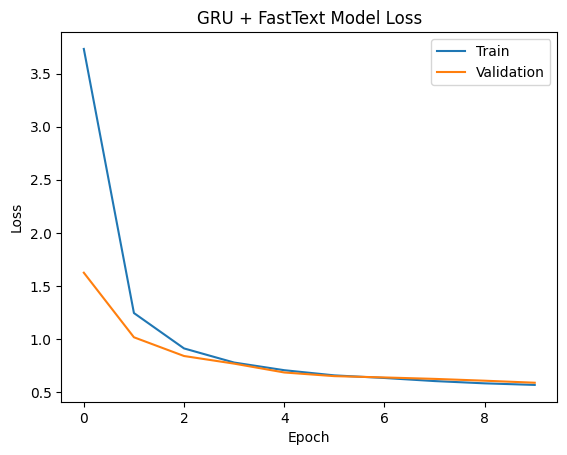

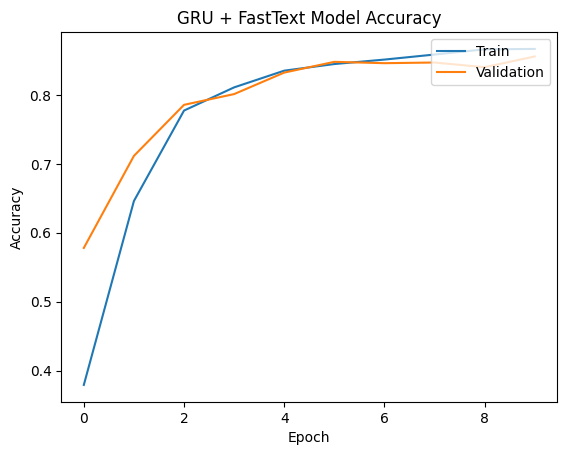

33/33 [==============================] - 1s 10ms/step
Accuracy: 0.876%
Recall Score: 0.876
Precision: 0.880
F1 Score: 0.877
33/33 [==============================] - 0s 12ms/step - loss: 0.5633 - accuracy: 0.8762
0.5633299946784973 0.876218318939209


In [265]:
res_gru_word2vec = test_model("GRU", "Word2Vec")
res_gru_glove = test_model("GRU", "Glove")
res_gru_fasttext = test_model("GRU", "FastText")

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 bidirectional_12 (Bidirecti  (None, 400, 256)         330240    
 onal)                                                           
                                                                 
 global_max_pooling1d_26 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_26 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 3,995,768
Trainable params: 331,268
Non

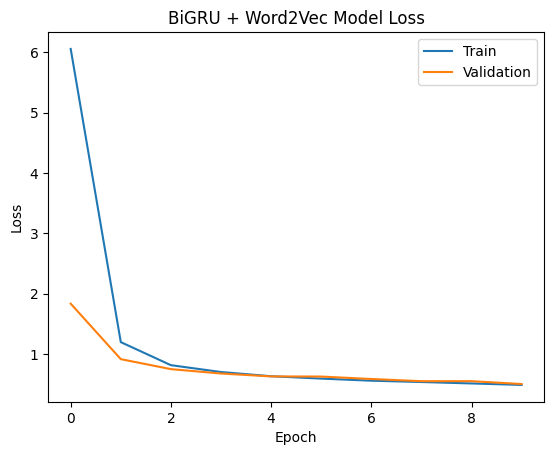

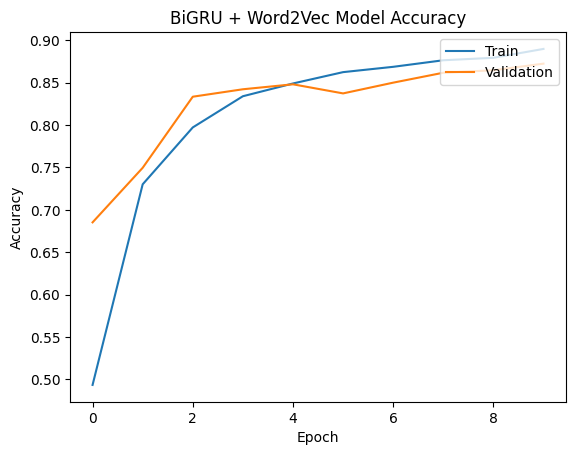

33/33 [==============================] - 1s 19ms/step
Accuracy: 0.879%
Recall Score: 0.879
Precision: 0.880
F1 Score: 0.879
33/33 [==============================] - 1s 19ms/step - loss: 0.5014 - accuracy: 0.8791
0.5014289021492004 0.8791422843933105
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 bidirectional_13 (Bidirecti  (None, 400, 256)         330240    
 onal)                                                           
                                                                 
 global_max_pooling1d_27 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
 

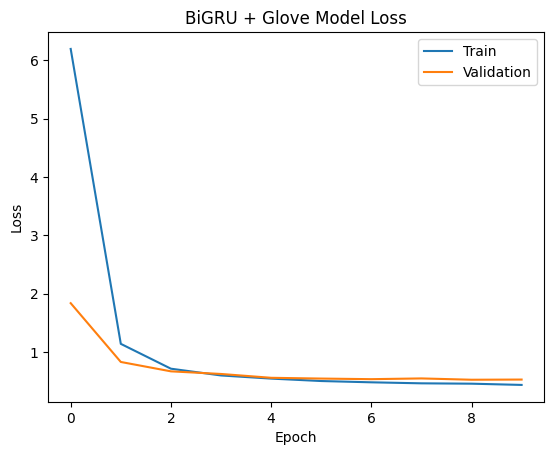

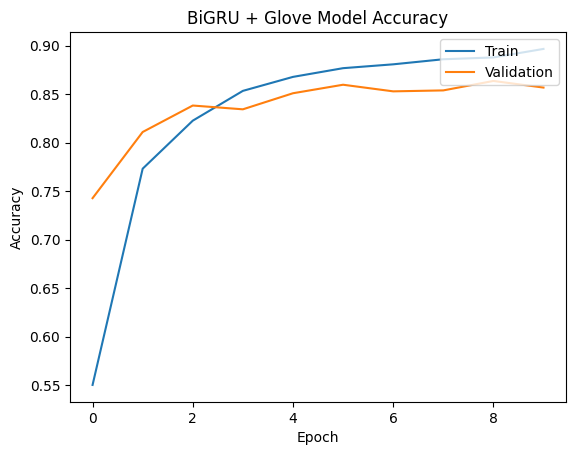

33/33 [==============================] - 1s 17ms/step
Accuracy: 0.858%
Recall Score: 0.858
Precision: 0.860
F1 Score: 0.858
33/33 [==============================] - 1s 19ms/step - loss: 0.5531 - accuracy: 0.8577
0.5530582070350647 0.8576998114585876
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 bidirectional_14 (Bidirecti  (None, 400, 256)         330240    
 onal)                                                           
                                                                 
 global_max_pooling1d_28 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
 

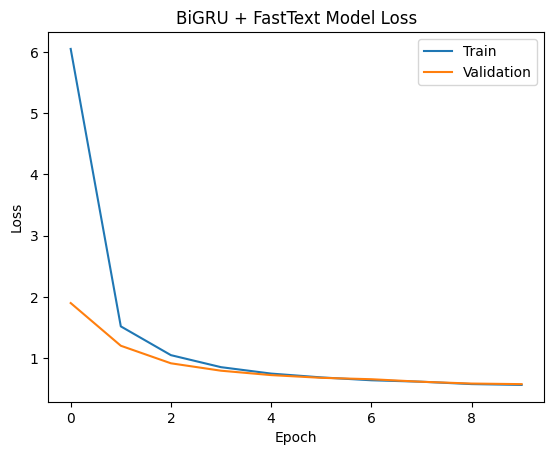

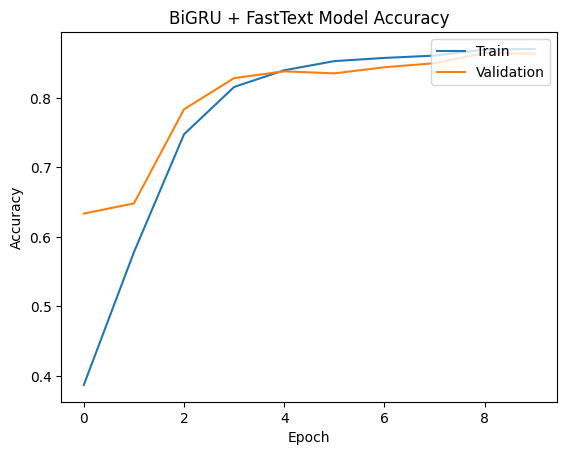

33/33 [==============================] - 1s 16ms/step
Accuracy: 0.880%
Recall Score: 0.880
Precision: 0.882
F1 Score: 0.880
33/33 [==============================] - 1s 19ms/step - loss: 0.5649 - accuracy: 0.8801
0.564902126789093 0.8801169395446777


In [266]:
res_bigru_word2vec = test_model("BiGRU", "Word2Vec")
res_bigru_glove = test_model("BiGRU", "Glove")
res_bigru_fasttext = test_model("BiGRU", "FastText")

In [267]:
from tabulate import tabulate

model_list = ["LSTM", "BiLSTM", "GRU", "BiGRU"]
embedding_list = ["Word2Vec", "Glove", "FastText"]
performance_list = ["Accuracy", "Recall", "Precision", "F1 Score"]
test_list = [res_lstm_word2vec, res_lstm_glove, res_lstm_fasttext, 
             res_bilstm_word2vec, res_bilstm_glove, res_bilstm_fasttext, 
             res_gru_word2vec, res_gru_glove, res_gru_fasttext, 
             res_bigru_word2vec, res_bigru_glove, res_bigru_fasttext]

results = [["Model"] + performance_list]

for model_key, model in enumerate(model_list):
    for embedding_key, embedding in enumerate(embedding_list):
        row = [f"{model} + {embedding}"]
        row.extend([round(test_list[model_key * len(embedding_list) + embedding_key][metric], 4) for metric in performance_list])
        results.append(row)

table = tabulate(results, headers="firstrow", tablefmt="fancy_grid")
print(table)

╒═══════════════════╤════════════╤══════════╤═════════════╤════════════╕
│ Model             │   Accuracy │   Recall │   Precision │   F1 Score │
╞═══════════════════╪════════════╪══════════╪═════════════╪════════════╡
│ LSTM + Word2Vec   │     0.8051 │   0.8051 │      0.8153 │     0.8055 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ LSTM + Glove      │     0.8626 │   0.8626 │      0.8674 │     0.8627 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ LSTM + FastText   │     0.7924 │   0.7924 │      0.7971 │     0.7915 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ BiLSTM + Word2Vec │     0.7524 │   0.7524 │      0.7647 │     0.7499 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ BiLSTM + Glove    │     0.8499 │   0.8499 │      0.8546 │     0.8508 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ BiLSTM + FastText │     0.7281 │   0.7281 │      